# Text Mining

## Load necessary packages

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from math import ceil

#preprocessing
from unidecode import unidecode
import re
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from nltk.stem import SnowballStemmer
from nltk.stem import RSLPStemmer

#train/test split
from sklearn.model_selection import StratifiedKFold

#vectorization
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#ML models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#performance metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\Mafalda\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

## Load corpora

In [4]:
def load_corpora(filelist,author=None):
    """
    Function that receives a list of document locations (filelist) and extracts
        and saves them in a Pandas DataFrame with the corresponding author.
        
    :param filelist: list of document locations (strings)
    :param author: str with the author of the texts in filelist (default: None)
             
    :return: Returns a Pandas DataFrame in which the first column contains
        the extracted text and the second column contains the respective author
    """
    files = []
    
    for file in filelist:
        location = "Corpora/"+file
        # save the document as a string
        corpus = Path(location).read_text(encoding="utf8")
        # get all strings on a list
        files.append(corpus)
    
    # create a Pandas DataFrame with the text and the respective author
    df = pd.DataFrame(files, columns=['Text'])
    df['Author'] = pd.Series([author for x in range(len(df.index))], index=df.index)
    return df

In [5]:
almada = [
    'train/AlmadaNegreiros/pg22615.txt',
    'train/AlmadaNegreiros/pg22730.txt',
    'train/AlmadaNegreiros/pg22801.txt',
    'train/AlmadaNegreiros/pg22802.txt',
    'train/AlmadaNegreiros/pg22969.txt',
    'train/AlmadaNegreiros/pg23133.txt',
    'train/AlmadaNegreiros/pg23620.txt',
    'train/AlmadaNegreiros/pg23879.txt',
    'train/AlmadaNegreiros/pg23961.txt'
]

corpora_almada = load_corpora(almada, 'Almada Negreiros')

In [6]:
camilo = [
    'train/CamiloCasteloBranco/24691-0.txt',
    'train/CamiloCasteloBranco/34756-0.txt',
    'train/CamiloCasteloBranco/pg16425.txt',
    'train/CamiloCasteloBranco/pg17927.txt',
    'train/CamiloCasteloBranco/pg19375.txt',
    'train/CamiloCasteloBranco/pg21406.txt',
    'train/CamiloCasteloBranco/pg23203.txt',
    'train/CamiloCasteloBranco/pg23345.txt',
    'train/CamiloCasteloBranco/pg23346.txt',
    'train/CamiloCasteloBranco/pg24339.txt',
    'train/CamiloCasteloBranco/pg25844.txt',
    'train/CamiloCasteloBranco/pg26017.txt',
    'train/CamiloCasteloBranco/pg26103.txt',
    'train/CamiloCasteloBranco/pg26110.txt',
    'train/CamiloCasteloBranco/pg26988.txt',
    'train/CamiloCasteloBranco/pg27364.txt',
    'train/CamiloCasteloBranco/pg27541.txt',
    'train/CamiloCasteloBranco/pg28310.txt',
    'train/CamiloCasteloBranco/pg31694.txt',
    'train/CamiloCasteloBranco/pg33788.txt',
]

corpora_camilo = load_corpora(camilo, 'Camilo Castelo Branco')

In [7]:
eca = [
    'train/EcaDeQueiros/pg18220.txt',
    'train/EcaDeQueiros/pg25641.txt',
    'train/EcaDeQueiros/pg27637.txt',
    'train/EcaDeQueiros/pg31347.txt',
    'train/EcaDeQueiros/pg40409.txt'
]

corpora_eca = load_corpora(eca, 'Eca de Queiros')

In [8]:
rodrigues_santos = [
    'train/JoseRodriguesSantos/A Filha Do Capitao - Jose Rodrigues dos Santos.txt',
    'train/JoseRodriguesSantos/A Formula De Deus - Jose Rodrigues dos Santos.txt',
    'train/JoseRodriguesSantos/A Mao do Diabo - Jose Rodrigues dos Santos.txt',
    'train/JoseRodriguesSantos/A Vida Num Sopro - Jose Rodrigues dos Santos.txt',
    'train/JoseRodriguesSantos/Furia Divina - Jose Rodrigues dos Santos.txt',
    'train/JoseRodriguesSantos/O Anjo Branco - Jose Rodrigues dos Santos.txt',
    'train/JoseRodriguesSantos/O Setimo Selo - Jose Rodrigues dos Santos.txt',
    'train/JoseRodriguesSantos/O ultimo Segredo - Jose Rodrigues dos Santos.txt'
]

corpora_rodrigues_santos = load_corpora(rodrigues_santos, 'Jose Rodrigues dos Santos')

In [9]:
saramago = [
    'train/JoseSaramago/A Caverna - Jose Saramago.txt',
    'train/JoseSaramago/As Intermitencias da Morte - Jose Saramago.txt',
    'train/JoseSaramago/Caim - Jose Saramago.txt',
    'train/JoseSaramago/Claraboia - Jose Saramago.txt',
    'train/JoseSaramago/Ensaio Sobre a Cegueira - Jose Saramago.txt',
    'train/JoseSaramago/Historia Do Cerco De Lisboa - Jose Saramago.txt',
    'train/JoseSaramago/Memorial Do Convento - Jose Saramago.txt',
    'train/JoseSaramago/O Ano Da Morte De Ricardo Reis - Jose Saramago.txt',
    'train/JoseSaramago/O Conto Da Ilha Desconhecida - Jose Saramago.txt',
    'train/JoseSaramago/O Homem Duplicado - Jose Saramago.txt',
    'train/JoseSaramago/Terra Do Pecado - Jose Saramago.txt',
    'train/JoseSaramago/Viagem Do Elefante - Jose Saramago.txt'
]

corpora_saramago = load_corpora(saramago, 'Jose Saramago')

In [10]:
luisa = [
    'train/LuisaMarquesSilva/ABelaHistoria.txt',
    'train/LuisaMarquesSilva/acabouSe.txt',
    'train/LuisaMarquesSilva/Botão.txt',
    'train/LuisaMarquesSilva/controlz.txt',
    'train/LuisaMarquesSilva/emedo.txt',
    'train/LuisaMarquesSilva/Lisboa2050.txt',
    'train/LuisaMarquesSilva/passeioInferno.txt',
    'train/LuisaMarquesSilva/rapsodiasemdo.txt',
    'train/LuisaMarquesSilva/UltimaHistoria.txt'
]

corpora_luisa = load_corpora(luisa, 'Luisa Marques Silva')

In [11]:
corpora = pd.concat([corpora_almada, corpora_camilo, corpora_eca, corpora_rodrigues_santos, corpora_saramago, corpora_luisa]).reset_index(drop = True)
corpora.head()

,Text,Author
0,Title: A Scena do Odio\n\nAuthor: José de Alma...,Almada Negreiros
1,Title: O Jardim da Pierrette\n\nAuthor: José d...,Almada Negreiros
2,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,Almada Negreiros
3,\nTitle: Litoral\n A Amadeo de Souza Car...,Almada Negreiros
4,\n\n\nEXPOSIÇÃO\n\n+amadeo\nde souza\ncardoso+...,Almada Negreiros


In [12]:
# get the word count for all the documents
word_count = corpora['Text'].apply(lambda x: len(str(x).split(" ")))
corpora['Word Count'] = word_count

corpora.head()

,Text,Author,Word Count
0,Title: A Scena do Odio\n\nAuthor: José de Alma...,Almada Negreiros,1456
1,Title: O Jardim da Pierrette\n\nAuthor: José d...,Almada Negreiros,280
2,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,Almada Negreiros,6212
3,\nTitle: Litoral\n A Amadeo de Souza Car...,Almada Negreiros,1225
4,\n\n\nEXPOSIÇÃO\n\n+amadeo\nde souza\ncardoso+...,Almada Negreiros,521


It can be seen that the size of the documents is not homogenous

## Data Exploration

In [13]:
corpora['Word Count'].describe()

count        63.000000
mean      54152.460317
std       52898.399211
min         280.000000
25%        6017.000000
50%       46862.000000
75%       77193.500000
max      206090.000000
Name: Word Count, dtype: float64

In [14]:
corpora.groupby(['Author']).sum()

,Word Count
Author,
Almada Negreiros,43610
Camilo Castelo Branco,749872
Eca de Queiros,438367
Jose Rodrigues dos Santos,1131971
Jose Saramago,1006571
Luisa Marques Silva,41214


It can be seen that some authors are undersampled

In [15]:
all_words = ' '.join(corpora['Text']).split()

In [16]:
# get the frequency of the words all over the corpora
freq = pd.Series(all_words).value_counts()

In [17]:
freq[:20]

a       127846
de      120149
que     113863
o       103194
e        88505
do       42188
não      40512
da       37763
um       36083
se       35485
os       33511
com      33468
para     32661
em       27668
uma      27231
as       24655
é        22983
no       19842
por      19786
na       17721
dtype: int64

In [18]:
stop_words = set(stopwords.words("portuguese"))
count = 0

# count the frequent words which are also stop words
for word in freq.index[:20]:
    if word in stop_words:
        count += 1
count

20

The most common words are also stop words

In [19]:
def get_top_n_grams(corpus, top_k, n):
    """
    Function that receives a list of documents (corpus) and extracts
        the top k most frequent n-grams for that corpus.
        
    :param corpus: list of texts
    :param top_k: int with the number of n-grams that we want to extract
    :param n: n gram type to be considered 
             (if n=1 extracts unigrams, if n=2 extracts bigrams, ...)
             
    :return: Returns a sorted Pandas DataFrame in which the first column 
        contains the extracted ngrams and the second column contains
        the respective counts
    """
    # get the top 2000 n-grams
    vec = CountVectorizer(ngram_range=(n, n), max_features=2000).fit(corpus)
    
    bag_of_words = vec.transform(corpus)
    
    # count how many times a word appears in the corpora
    sum_words = bag_of_words.sum(axis=0) 
    
    words_freq = []
    for word, idx in vec.vocabulary_.items():
        words_freq.append((word, sum_words[0, idx]))
        
    # save the frequencies in a Pandas DataFrame
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_df = pd.DataFrame(words_freq[:top_k])
    top_df.columns = ["Ngram", "Freq"]
    return top_df

In [20]:
def plot_frequencies(top_df):
    """
    Function that receives a Pandas DataFrame from the "get_top_n_grams" function
        and plots the frequencies in a bar plot.
        
    :param top_df: a sorted Pandas DataFrame in which the first column 
        contains the top k ngrams and the second column contains
        the respective counts
    """
    x_labels = top_df["Ngram"][:30]
    y_pos = np.arange(len(x_labels))
    values = top_df["Freq"][:30]
    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, x_labels)
    plt.ylabel('Frequencies')
    plt.title('Words')
    plt.xticks(rotation=90)
    plt.show()

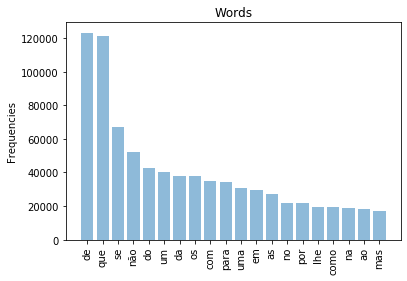

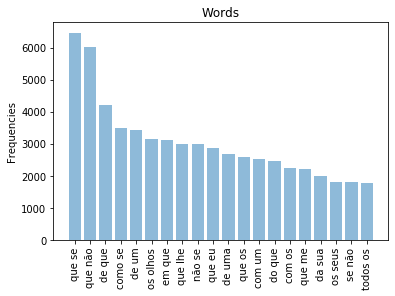

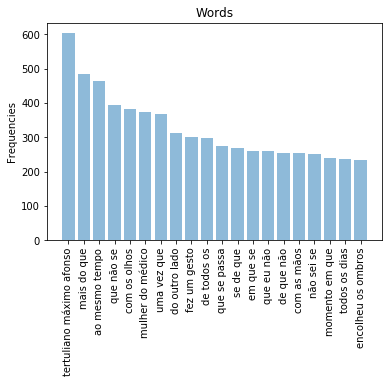

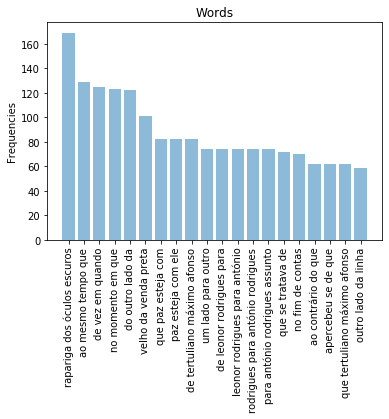

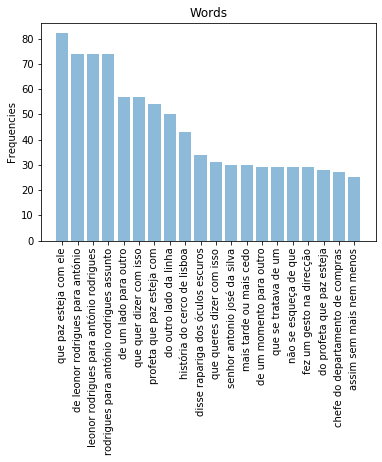

In [21]:
# plot the distribution of the top 20 n-grams with n up to 5
for i in range(1,6):
    top = get_top_n_grams(corpora["Text"], top_k=20, n=i)
    plot_frequencies(top)

## Preprocessing

In [22]:
def preprocessing(dataframe,punctuation=False,tags=False,stemming=False,stemmer='snowball'):
    """
    Function that receives a Pandas DataFrame with the texts and applies
        the chosen preprocessing techiniques.
        
    :param dataframe: a Pandas DataFrame in which the first column 
        contains the estracted texts the second column contains the
        respective authors
    :param punctuation: bool determining whether or remove punctuation
        and numbers or not (default: False)
    :param tags: bool determining whether to remove tags or not
        (default: False)
    :param stemming: bool determining whether to perform stemming or not
        (default: False)
    :param stemmer: str specifying which stemmer to use (default: 'snowball')
    
             
    :return: Returns a list of strings which correspond to each text after
        preprocessing
    """
    
    processed_corpus = []
    
    stop_words_pt = set(stopwords.words("portuguese"))
    
    # for each text in the Pandas DataFrame
    for i in tqdm(range(len(dataframe))):
        text = dataframe['Text'][i]
                
        # remove punctuation
        if punctuation:
            text = re.sub('[^a-zA-Z]', ' ', text)

        # remove tags
        if tags:
            text = BeautifulSoup(text).get_text()
        
        # convert to list from str
        text = text.split()

        # stemming
        if stemming:
            # choose the stemmer
            if stemmer == 'snowball':
                stemmer_pt = SnowballStemmer('portuguese')
            elif stemmer == 'rslp':
                stemmer_pt = RSLPStemmer()
            
            # don't stem stop words so that they can still be detected
            text = [stemmer_pt.stem(word) for word in text if not word in stop_words_pt]
        
        # convert to str from list
        text = " ".join(text)

        # save the preprocessed text on a list
        processed_corpus.append(text)
    return processed_corpus

## Tests

In [23]:
# preprocess the text and save it in a Pandas Series
cleaned_corpora = preprocessing(
    corpora,
    #punctuation=True,
    #tags=True,
    stemming=True,
    stemmer='rslp'
)
corpora['Clean Text'] = pd.Series(cleaned_corpora, index = corpora.index)

In [24]:
corpora.head()

,Text,Author,Word Count,Clean Text
0,Title: A Scena do Odio\n\nAuthor: José de Alma...,Almada Negreiros,1456,title: a scen odi author: josé alm negr releas...
1,Title: O Jardim da Pierrette\n\nAuthor: José d...,Almada Negreiros,280,title: o jardim pierrett author: josé alm negr...
2,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,Almada Negreiros,6212,title: a invenç dia clar author: josé alm negr...
3,\nTitle: Litoral\n A Amadeo de Souza Car...,Almada Negreiros,1225,title: litor a amade souz cardoz author: josé ...
4,\n\n\nEXPOSIÇÃO\n\n+amadeo\nde souza\ncardoso+...,Almada Negreiros,521,expos +amade souz cardoso+ lig naval de lisbo ...


In [25]:
# convert each clean text into a list of strnigs
corpora['Word List'] = corpora['Clean Text']

# for each test in the corpora
for i in tqdm(range(len(corpora))):
    mystr = corpora['Clean Text'][i]
    wordList = mystr.split()
    
    corpora['Word List'][i] = wordList
    
corpora.head()

,Text,Author,Word Count,Clean Text,Word List
0,Title: A Scena do Odio\n\nAuthor: José de Alma...,Almada Negreiros,1456,title: a scen odi author: josé alm negr releas...,"[title:, a, scen, odi, author:, josé, alm, neg..."
1,Title: O Jardim da Pierrette\n\nAuthor: José d...,Almada Negreiros,280,title: o jardim pierrett author: josé alm negr...,"[title:, o, jardim, pierrett, author:, josé, a..."
2,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,Almada Negreiros,6212,title: a invenç dia clar author: josé alm negr...,"[title:, a, invenç, dia, clar, author:, josé, ..."
3,\nTitle: Litoral\n A Amadeo de Souza Car...,Almada Negreiros,1225,title: litor a amade souz cardoz author: josé ...,"[title:, litor, a, amade, souz, cardoz, author..."
4,\n\n\nEXPOSIÇÃO\n\n+amadeo\nde souza\ncardoso+...,Almada Negreiros,521,expos +amade souz cardoso+ lig naval de lisbo ...,"[expos, +amade, souz, cardoso+, lig, naval, de..."


In [26]:
# divide the texts into sections of up to 500 words
corpora_500 = pd.DataFrame(columns=['Author','500 Word List','500 Clean Text'])

# for each text in the corpora
for i in tqdm(range(len(corpora))):
    text = corpora['Word List'][i]
    # get a list of lists with up to 500 words
    list_500 = [text[i:i+500] for i in range(0, len(text), 500)]
    # convert the lists to strings
    text_500 = [" ".join(list) for list in list_500]
    
    # save the list of lists and the list of string on a Pandas DataFrame
    d_500 = pd.DataFrame({'Author':corpora['Author'][i],'500 Word List':list_500,'500 Clean Text':text_500})
    corpora_500 = corpora_500.append(d_500,ignore_index=True)
    
corpora_500.head()

,Author,500 Word List,500 Clean Text
0,Almada Negreiros,"[title:, a, scen, odi, author:, josé, alm, neg...",title: a scen odi author: josé alm negr releas...
1,Almada Negreiros,"[branc, par, vict, torneios-lot, donzellas-glo...",branc par vict torneios-lot donzellas-glorias!...
2,Almada Negreiros,"[lua, enxovalh, vir, lavadeira!, larg, cidad, ...",lua enxovalh vir lavadeira! larg cidad foge! l...
3,Almada Negreiros,"[title:, o, jardim, pierrett, author:, josé, a...",title: o jardim pierrett author: josé alm negr...
4,Almada Negreiros,"[title:, a, invenç, dia, clar, author:, josé, ...",title: a invenç dia clar author: josé alm negr...


In [27]:
corpora = corpora_500
corpora.shape

(4237, 3)

In [28]:
# create a stratified 5-fold division for cross validation
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

The 5-fold division was chosen as it creates train/test splits with an 80/20 split

In [29]:
# test with either of these classifiers

#classifier = KNeighborsClassifier()
#classifier = MultinomialNB()
#classifier = SVC()
#classifier = DecisionTreeClassifier()
classifier = LogisticRegression()

In [30]:
# test with either of these feature extractors

vectorizer = CountVectorizer(
    #max_df=0.7,
    #strip_accents='unicode',
    lowercase=False,
    #stop_words=stop_words,
    max_features=50000,
    #ngram_range=(1,3)
)
#vectorizer = TfidfVectorizer(
#    lowercase=False,
#    max_features=50000
#)

In [31]:
accuracy = 0
recall = 0

# for each of the 5-fold splits
for (train, test) in kf.split(corpora['500 Clean Text'],corpora['Author']):
    # vectorize the train and test sets
    X_train = vectorizer.fit_transform(corpora['500 Clean Text'][train])
    X_test = vectorizer.transform(corpora['500 Clean Text'][test])
    y = corpora['Author']
    
    # fit the classifier to the train sets
    classifier.fit(X_train,y[train])
    
    # predict the labels of the test set
    prediction = classifier.predict(X_test)
    
    #find the accuracy and recall of this classifier on this split
    accuracy += accuracy_score(y[test],prediction)*100
    recall += recall_score(y[test],prediction,average=None)*100
    
    # print a classification report and confusion matrix
    print(classification_report(y_true = y[test], y_pred = prediction))
    print(confusion_matrix(y_true = y[test], y_pred = prediction))

# print the average accuracy and recall for the classifier
print(accuracy/5)
print(recall/5)

                           precision    recall  f1-score   support

         Almada Negreiros       1.00      0.77      0.87        13
    Camilo Castelo Branco       0.99      0.98      0.99       189
           Eca de Queiros       0.97      0.99      0.98       114
Jose Rodrigues dos Santos       1.00      1.00      1.00       285
            Jose Saramago       1.00      1.00      1.00       235
      Luisa Marques Silva       0.69      0.92      0.79        12

                 accuracy                           0.99       848
                macro avg       0.94      0.94      0.94       848
             weighted avg       0.99      0.99      0.99       848

[[ 10   0   2   0   0   1]
 [  0 186   1   0   0   2]
 [  0   1 113   0   0   0]
 [  0   0   0 284   0   1]
 [  0   0   0   0 234   1]
 [  0   0   0   1   0  11]]
                           precision    recall  f1-score   support

         Almada Negreiros       1.00      0.92      0.96        13
    Camilo Castelo Branco    

## Load new corpora

In [32]:
files = [
    'test/500Palavras/text1.txt',
    'test/500Palavras/text2.txt',
    'test/500Palavras/text3.txt',
    'test/500Palavras/text4.txt',
    'test/500Palavras/text5.txt',
    'test/500Palavras/text6.txt',
    'test/1000Palavras/text1.txt',
    'test/1000Palavras/text2.txt',
    'test/1000Palavras/text3.txt',
    'test/1000Palavras/text4.txt',
    'test/1000Palavras/text5.txt',
    'test/1000Palavras/text6.txt',
]

new_corpora = load_corpora(files)

In [33]:
new_corpora

,Text,Author
0,"Depois, pouco a pouco, a tranquilidade regress...",None
1,Justamente como se eu tivesse tido a ideia de ...,None
2,"Quase um mês depois, a época de exames aproxim...",None
3,"Agora, porém, era sem fervor, arrastadamente, ...",None
4,"O cahos de cima a descer, a descer com a morta...",None
5,"""O Senhor ensina pela pena o que o homem não s...",None
6,"Depois, pouco a pouco, a tranquilidade regress...",None
7,Justamente como se eu tivesse tido a ideia de ...,None
8,"Quase um mês depois, a época de exames aproxim...",None
9,"Agora, porém, era sem fervor, arrastadamente, ...",None


## Train the chosen model

In [34]:
X = corpora['500 Clean Text']
y = corpora['Author']

X_cv = vectorizer.fit_transform(X)
classifier.fit(X_cv,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Classify the new text

In [35]:
cleaned_corpora = preprocessing(new_corpora,stemming=True,stemmer='rslp')

In [36]:
new_corpora['Clean Text'] = pd.Series(cleaned_corpora, index = new_corpora.index)

In [37]:
new_cv = vectorizer.transform(new_corpora['Clean Text'])
prediction = classifier.predict(new_cv)

In [38]:
prediction

array(['Jose Saramago', 'Almada Negreiros', 'Jose Rodrigues dos Santos',
       'Eca de Queiros', 'Camilo Castelo Branco',
       'Jose Rodrigues dos Santos', 'Jose Saramago', 'Almada Negreiros',
       'Jose Rodrigues dos Santos', 'Eca de Queiros',
       'Camilo Castelo Branco', 'Jose Rodrigues dos Santos'], dtype=object)

## Extra: Neural networks

In [39]:
from gensim.models import Word2Vec
from sklearn.neural_network import MLPClassifier

In [40]:
def text_score(corpora,w2v):
    """
    Function that receives a Pandas DataFrame with the texts and the word
        embeddings of a sample of texts and finds the average score of each
        score.
        
    :param corpora: a Pandas DataFrame with texts that have been saved as
        lists of strings
    :param w2v: the Word2Vec embeddings of a sample of texts
               
    :return: Returns a list of ints which are the average of the word
        embeddings of each text
    """
    
    text_scores = []
    
    # for each text in the corpora
    for i in tqdm(corpora.index):
        text = corpora['500 Word List'].loc[i]
        n = len(text)
        text_vect = []
        
        # for each word in the text
        for word in text:
            # find the score for that word and add it to
            # the score of the text
            if text_vect == []:
                text_vect = w2v[word]

            else:
                text_vect = np.add(text_vect,w2v[word])

        # calculate the average score of the sentence
        score = list(np.asarray(text_vect) / n)

        text_scores.append(score)
    
    return text_scores

In [41]:
classifier = MLPClassifier()

In [43]:
accuracy = 0
recall = 0

# find the word embeddings for the words in the corpora
word_embeddings = Word2Vec(corpora['500 Word List'],min_count=0,workers=4)

# for each of the 5-fold splits
for (train, test) in kf.split(corpora,corpora['Author']):
    # get the text scores for the texts in the train and test set
    X_train = text_score(corpora.iloc[train],word_embeddings)
    X_test = text_score(corpora.iloc[test],word_embeddings)
    y = corpora['Author']
    
    # fit the classifier to the train sets
    classifier.fit(X_train,y[train])
    
    # predict the labels of the test set
    prediction = classifier.predict(X_test)
    
    #find the accuracy and recall of this classifier on this split
    accuracy += accuracy_score(y[test],prediction)*100
    recall += recall_score(y[test],prediction,average=None)*100
    
    # print a classification report and confusion matrix
    print(classification_report(y_true = y[test], y_pred = prediction))
    print(confusion_matrix(y_true = y[test], y_pred = prediction))
    
# print the average accuracy and recall for the classifier
print(accuracy/5)
print(recall/5)


                           precision    recall  f1-score   support

         Almada Negreiros       1.00      0.08      0.14        13
    Camilo Castelo Branco       0.93      0.89      0.91       189
           Eca de Queiros       0.81      0.88      0.84       114
Jose Rodrigues dos Santos       0.95      0.96      0.95       285
            Jose Saramago       0.89      0.97      0.93       235
      Luisa Marques Silva       1.00      0.08      0.15        12

                 accuracy                           0.91       848
                macro avg       0.93      0.64      0.66       848
             weighted avg       0.91      0.91      0.90       848

[[  1   1   7   1   3   0]
 [  0 168  14   2   5   0]
 [  0   8 100   2   4   0]
 [  0   1   1 273  10   0]
 [  0   2   0   5 228   0]
 [  0   1   1   4   5   1]]



                           precision    recall  f1-score   support

         Almada Negreiros       0.50      0.15      0.24        13
    Camilo Castelo Branco       0.90      0.93      0.91       189
           Eca de Queiros       0.88      0.87      0.87       114
Jose Rodrigues dos Santos       0.91      0.96      0.94       284
            Jose Saramago       0.91      0.91      0.91       236
      Luisa Marques Silva       1.00      0.08      0.15        12

                 accuracy                           0.90       848
                macro avg       0.85      0.65      0.67       848
             weighted avg       0.90      0.90      0.89       848

[[  2   4   3   0   4   0]
 [  0 175  10   2   2   0]
 [  1   9  99   3   2   0]
 [  0   3   0 274   7   0]
 [  1   4   1  15 215   0]
 [  0   0   0   6   5   1]]



                           precision    recall  f1-score   support

         Almada Negreiros       0.80      0.31      0.44        13
    Camilo Castelo Branco       0.86      0.98      0.92       189
           Eca de Queiros       0.88      0.75      0.81       114
Jose Rodrigues dos Santos       0.96      0.93      0.94       284
            Jose Saramago       0.89      0.97      0.93       236
      Luisa Marques Silva       0.00      0.00      0.00        11

                 accuracy                           0.90       847
                macro avg       0.73      0.65      0.67       847
             weighted avg       0.89      0.90      0.90       847

[[  4   1   6   0   2   0]
 [  0 185   2   1   1   0]
 [  0  25  85   2   2   0]
 [  1   2   3 263  15   0]
 [  0   1   1   5 229   0]
 [  0   0   0   2   9   0]]



                           precision    recall  f1-score   support

         Almada Negreiros       0.75      0.23      0.35        13
    Camilo Castelo Branco       0.96      0.90      0.93       189
           Eca de Queiros       0.83      0.89      0.86       114
Jose Rodrigues dos Santos       0.93      0.96      0.95       284
            Jose Saramago       0.92      0.96      0.94       236
      Luisa Marques Silva       0.00      0.00      0.00        11

                 accuracy                           0.92       847
                macro avg       0.73      0.66      0.67       847
             weighted avg       0.90      0.92      0.91       847

[[  3   1   5   2   2   0]
 [  0 171  15   1   2   0]
 [  0   7 102   5   0   0]
 [  0   0   0 273  11   0]
 [  1   0   1   7 227   0]
 [  0   0   0   5   6   0]]



                           precision    recall  f1-score   support

         Almada Negreiros       1.00      0.17      0.29        12
    Camilo Castelo Branco       0.94      0.95      0.94       190
           Eca de Queiros       0.88      0.90      0.89       113
Jose Rodrigues dos Santos       0.92      0.96      0.94       285
            Jose Saramago       0.91      0.94      0.92       235
      Luisa Marques Silva       0.00      0.00      0.00        12

                 accuracy                           0.92       847
                macro avg       0.78      0.65      0.66       847
             weighted avg       0.91      0.92      0.91       847

[[  2   1   4   0   5   0]
 [  0 180   4   3   3   0]
 [  0   7 102   3   1   0]
 [  0   2   4 273   6   0]
 [  0   1   2  12 220   0]
 [  0   0   0   6   6   0]]
91.00796930342385
[18.71794872 92.91562239 85.77239559 95.35804299 94.99206635  3.33333333]


In [44]:
# get the list of words for the new texts
new_corpora['Word List'] = new_corpora['Clean Text']

for i in tqdm(range(len(new_corpora))):
    text = new_corpora['Clean Text'][i]
    
    new_corpora['Word List'][i] = text.split()

In [45]:
# rename the columns in the new corpora so that they're the same as the ones in the train corpora
new_corpora = new_corpora.rename(columns={'Word List':'500 Word List','Clean Text':'500 Clean Text'})
# drop the 'Text' column as it's not common to both DataFrames
new_corpora = new_corpora.drop(columns=['Text'])
# concat both DataFrames
all_corpora = pd.concat([corpora,new_corpora])
all_corpora

,500 Clean Text,500 Word List,Author
0,title: a scen odi author: josé alm negr releas...,"[title:, a, scen, odi, author:, josé, alm, neg...",Almada Negreiros
1,branc par vict torneios-lot donzellas-glorias!...,"[branc, par, vict, torneios-lot, donzellas-glo...",Almada Negreiros
2,lua enxovalh vir lavadeira! larg cidad foge! l...,"[lua, enxovalh, vir, lavadeira!, larg, cidad, ...",Almada Negreiros
3,title: o jardim pierrett author: josé alm negr...,"[title:, o, jardim, pierrett, author:, josé, a...",Almada Negreiros
4,title: a invenç dia clar author: josé alm negr...,"[title:, a, invenç, dia, clar, author:, josé, ...",Almada Negreiros
5,compunh palavras; arranc arvor prens ond apert...,"[compunh, palavras;, arranc, arvor, prens, ond...",Almada Negreiros
6,est hom sós raça-- phenicio! cad vint doi sign...,"[est, hom, sós, raça--, phenicio!, cad, vint, ...",Almada Negreiros
7,"ajuda- ir á loucura. vae tamb pessoalmente, co...","[ajuda-, ir, á, loucura., vae, tamb, pessoalme...",Almada Negreiros
8,cant succed ás tangerin rol pró mar: tam tam-t...,"[cant, succed, ás, tangerin, rol, pró, mar:, t...",Almada Negreiros
9,eu ia tão contente! ia pens ti verb sab verb g...,"[eu, ia, tão, contente!, ia, pens, ti, verb, s...",Almada Negreiros


In [46]:
# find the word embeddings for the words in the corpora
word_embeddings = Word2Vec(all_corpora['500 Word List'],min_count=0,workers=4)

In [47]:
# get the text scores for the texts in the train set
X_train = text_score(corpora,word_embeddings)
y_train = corpora['Author']

In [48]:
# predict the labels of the test set
classifier.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [49]:
# get the text scores for the texts in the test set
X_test = text_score(new_corpora,word_embeddings)

# predict the labels of the test set
prediction = classifier.predict(X_test)

In [50]:
prediction

array(['Jose Saramago', 'Eca de Queiros', 'Jose Saramago',
       'Eca de Queiros', 'Camilo Castelo Branco',
       'Jose Rodrigues dos Santos', 'Jose Saramago', 'Eca de Queiros',
       'Jose Saramago', 'Eca de Queiros', 'Camilo Castelo Branco',
       'Jose Rodrigues dos Santos'], dtype='<U25')